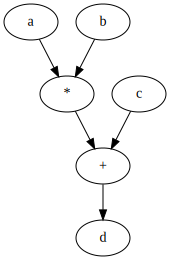

In [10]:
from graphviz import Digraph

dot = Digraph(comment='运算过程图')

# 添加节点
dot.node('a', 'a')
dot.node('b', 'b')
dot.node('c', 'c')
dot.node('mult', '*')
dot.node('add', '+')
dot.node('d', 'd')

# 添加边
dot.edge('a', 'mult')
dot.edge('b', 'mult')
dot.edge('mult', 'add')
dot.edge('c', 'add')
dot.edge('add', 'd')

# 渲染图像
display(dot)

In [12]:
class Value:
    """ stores a single scalar value and its gradient """

    def __init__(self, data, _children=(), _op=''):
        self.data = data
        self.grad = 0
        # internal variables used for autograd graph construction
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op # the op that produced this node, for graphviz / debugging / etc

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad  # +=进行梯度累加
            other.grad += self.data * out.grad
        out._backward = _backward

        return out

    def __rmul__(self, other): # other * self
        return self * other

In [13]:
#utf-8
a = Value(2.0)

print((2*a).data)

4.0


In [15]:
[[1,3,4]] + [4,3,4,1]


[[1, 3, 4], 4, 3, 4, 1]

In [33]:
def get_count(idx):
    counts = {}
    for x in zip(idx, idx[1:]):
        counts[x] = counts.get(x, 0) + 1
    return counts


states = get_count(idx)
top_value = max(states, key=states.get)
print(top_value)

(239, 188)


In [38]:
def merge(idx,top_value,index):
    new_idx = []
    i = 0
    while  i < len(idx):
        if i < len(idx)-1 and  idx[i] == top_value[0] and idx[i+1] == top_value[1]:
            new_idx.append(index)
            i += 2
        else:
            new_idx.append(idx[i])
            i += 1
    return new_idx

merge([6,6,9,0,9],(6,6),7)


[7, 9, 0, 9]

In [86]:
vocab = {idx: bytes([idx]) for idx in range(256)}
merges = {
    (104,105):257,
    (7,7):258,
    (8,7):259,
    (9,8):260,
    (100,2):261,
}
for (p1,p2),v in merges.items():
    vocab[v] = vocab[p1] + vocab[p2]
    # print(list(vocab[v]))

# for k,v in vocab.items():
#     print(list(v))
print(list(vocab[230]))
print(idx)

[230]
[230, 130, 168, 229, 165, 189, 239, 188, 129, 240, 159, 150, 188, 32, 239, 188, 136, 104, 101, 108, 108, 111, 32, 105, 110, 32, 67, 104, 105, 110, 101, 115, 101, 41]


In [90]:
def decode(idx):
    tokens = b"".join(vocab[id] for id in idx)
    print(tokens)
    text = tokens.decode("utf-8",errors="replace")     
    print(text)
    return text

# 128 不是所有的值都能被编码成utf-8
# decode([103,257,102])
decode([128])

b'\x80'
�


'�'

In [107]:

merges = {
    (104,105):257,
    (101, 108):258,
    (111, 32):259,
    (9,8):260,
    (100,2):261,
}

def encode(text):
    token = list(text.encode('utf-8'))
    while len(token) > 1:
        count = get_count(token)
        pair = min(count,key=lambda p : merges.get(p,float('inf')))
        # print(merges.get((9, 32),float('inf')))
        # print(count)
        # print(pair)
        if pair not in merges:
            break
        idx = merges[pair]
        token = merge(token,pair,idx)
    
    return token

encode('hello world,hello human')

[104]

In [109]:
decode(encode('我爱中国'))

b'\xe6\x88\x91\xe7\x88\xb1\xe4\xb8\xad\xe5\x9b\xbd'
我爱中国


'我爱中国'